In [1]:
%load_ext autoreload
#from coffea import util, processor
from msdprocessor import msdProcessor
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import distributed
import dask
import awkward as ak
import hist
import matplotlib.pyplot as plt
import dask_awkward

/uscms/home/jennetd/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [2]:
fileset = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/QCD_Pt470to600.root"

In [3]:
events = NanoEventsFactory.from_root(
    {fileset: "/Events"},
    #permit_dask=True,
    schemaclass=PFNanoAODSchema
).events()

In [4]:
dask_awkward.num(events, axis=0).compute()

92000

In [5]:
result = msdProcessor().process(events)

[594, 650, 572, 586, None, 594, None, ..., 619, 550, 546, 602, 558, 652, 580]


In [14]:
compute=dask.compute(result)[0]

In [17]:
h = compute['ExampleHistogram']
h

Hist(
  Regular(120, 0, 1200, name='pt', label='Jet $p_{T}$ [GeV]'),
  Regular(100, -6, 6, name='eta', label='Jet eta'),
  storage=Weight()) # Sum: WeightedSum(value=87634.2, variance=87634.4) (WeightedSum(value=92000.3, variance=92000.6) with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc7052dc350>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

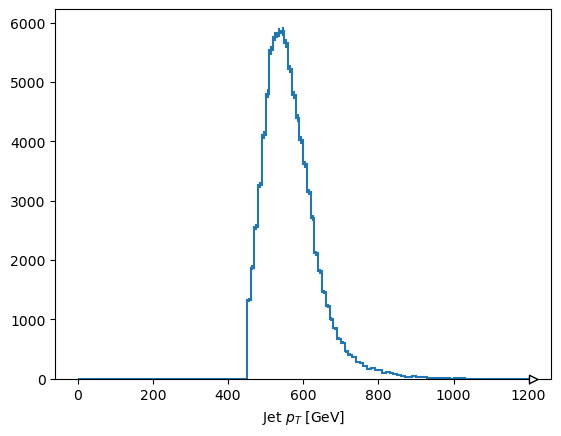

In [21]:
# Then make some plots
h[{'eta':sum}].plot1d()

# This sums over eta and draws pT

In [ ]:
events['q1pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['q2pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['hpt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['detaqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['dphiqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['mqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));